In [ ]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [ ]:
#Prepocessing

df = pd.read_csv('../data/50000_rows_for_first_model.csv')
X_train = df[['price', 'vendor', 'product_cat', 'gender', 'quantity' , 'final_price', 'product_gender']]

cat_transformer = OneHotEncoder(handle_unknown='ignore',sparse = False)
num_transformer = MinMaxScaler()

#Paralellize "num_transformer" and "One hot encoder"
preprocessor = ColumnTransformer([
    ('num_tr_Minmax', num_transformer, ['price','price','final_price']),
    ('cat_tr', cat_transformer, ['vendor', 'product_cat', 'gender','product_gender'])],
    remainder= 'passthrough')

X_train_transformed = preprocessor.fit_transform(X_train)

FileNotFoundError: [Errno 2] No such file or directory: '../data/'

Text(0.5, 0, 'k cluster number')

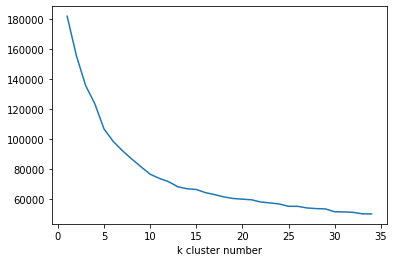

In [22]:
# find the best K
inertias = []
ks = range(1,35)
for k in ks:
    km_test = KMeans(n_clusters=k).fit(X_train_transformed)
    inertias.append(km_test.inertia_)
plt.plot(ks, inertias)
plt.xlabel('k cluster number')

In [24]:
# instantiate the KMeans model with k = 10

km = KMeans(n_clusters=10)
km.fit(X_train_transformed)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [37]:
# Add the prediction result to the original df

df['Customer segmentation'] = km.labels_

## Inspect the results_ 1219

In [38]:
#label_encode the product_cat

from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
enc.fit(df['product_cat'])
df['product_cat_encoded'] = enc.transform(df['product_cat'])

<AxesSubplot:>

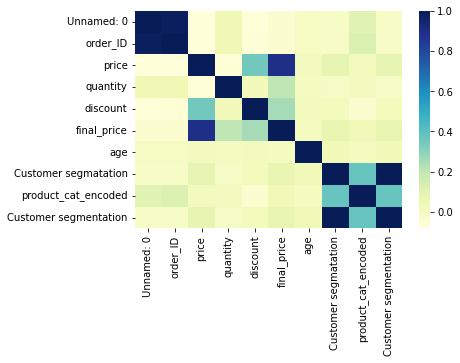

In [39]:
import seaborn as sns

# Heatmap
corr = df.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap= "YlGnBu")

In [41]:
corr_df = corr.unstack().reset_index() # Unstack correlation matrix 
corr_df.columns = ['feature_1','feature_2', 'correlation'] # rename columns
corr_df.sort_values(by="correlation",ascending=False, inplace=True) # sort by correlation
corr_df = corr_df[corr_df['feature_1'] != corr_df['feature_2']] # Remove self correlation
selected_rows = corr_df[~corr_df['correlation'].isnull()]
selected_rows = selected_rows[selected_rows["feature_2"] == "Customer segmentation"]
selected_rows

,feature_1,feature_2,correlation
79,Customer segmatation,Customer segmentation,1.000000
89,product_cat_encoded,Customer segmentation,0.377882
29,price,Customer segmentation,0.077719
59,final_price,Customer segmentation,0.069719
69,age,Customer segmentation,0.029893
49,discount,Customer segmentation,0.014624
39,quantity,Customer segmentation,-0.010026
9,Unnamed: 0,Customer segmentation,-0.015877
19,order_ID,Customer segmentation,-0.016780


In [29]:
pd.set_option('display.max_rows', selected_rows.shape[0]+1)